### Text Loader allows to load data from a text file

In [1]:
from langchain.document_loaders import TextLoader
# from langchain.document_loaders.csv_loader import CSVLoader

In [2]:
loader = TextLoader("nvda_news_1.txt")
data = loader.load()

In [3]:
data[0].page_content
data[0].metadata
type(data[0])

langchain.schema.document.Document

In [13]:
# loader = CSVLoader(file_path="movies.csv", source_column="title")

## UnstructuredURLLoader
UnstructuredURLLoader of Langchain internally uses unstructured python library to load the content from url's

https://unstructured-io.github.io/unstructured/introduction.html

https://pypi.org/project/unstructured/#description

In [16]:
#installing necessary libraries, libmagic is used for file type detection
# !pip install unstructured libmagic python-magic

In [4]:
from langchain.document_loaders import UnstructuredURLLoader

In [5]:
loader = UnstructuredURLLoader(
    urls = [
        "https://www.moneycontrol.com/news/business/banks/hdfc-bank-re-appoints-sanmoy-chakrabarti-as-chief-risk-officer-11259771.html",
        "https://www.moneycontrol.com/news/business/markets/market-corrects-post-rbi-ups-inflation-forecast-icrr-bet-on-these-top-10-rate-sensitive-stocks-ideas-11142611.html"
    ]
)

In [7]:
!pip show libmagic

Name: libmagic
Version: 1.0
Summary: libmagic bindings
Home-page: http://bitbucket.org/xmonader/pymagic-dev
Author: Ahmed Youssef
Author-email: xmonader@gmail.com
License: GPL v3
Location: /Users/miguelhermar/anaconda3/lib/python3.11/site-packages
Requires: 
Required-by: 


In [11]:
data = loader.load()
len(data)

2

In [13]:
 data[0].metadata

{'source': 'https://www.moneycontrol.com/news/business/banks/hdfc-bank-re-appoints-sanmoy-chakrabarti-as-chief-risk-officer-11259771.html'}

In [14]:
data[0].page_content[0:100]

'English\n\nHindi\n\nGujarati\n\nSpecials\n\nTrending Stocks\n\nVedanta\xa0INE205A01025, VEDL, 500295\n\nSuzlon Ener'

## Text Splitters
Why do we need text splitters in first place?

LLM's have token limits. Hence we need to split the text which can be large into small chunks so that each chunk size is under the token limit. There are various text splitter classes in langchain that allows us to do this.

In [17]:
# Taking some random text from wikipedia

text = """Interstellar is a 2014 epic science fiction film co-written, directed, and produced by Christopher Nolan. 
It stars Matthew McConaughey, Anne Hathaway, Jessica Chastain, Bill Irwin, Ellen Burstyn, Matt Damon, and Michael Caine. 
Set in a dystopian future where humanity is embroiled in a catastrophic blight and famine, the film follows a group of astronauts who travel through a wormhole near Saturn in search of a new home for humankind.

Brothers Christopher and Jonathan Nolan wrote the screenplay, which had its origins in a script Jonathan developed in 2007 and was originally set to be directed by Steven Spielberg. 
Kip Thorne, a Caltech theoretical physicist and 2017 Nobel laureate in Physics,[4] was an executive producer, acted as a scientific consultant, and wrote a tie-in book, The Science of Interstellar. 
Cinematographer Hoyte van Hoytema shot it on 35 mm movie film in the Panavision anamorphic format and IMAX 70 mm. Principal photography began in late 2013 and took place in Alberta, Iceland, and Los Angeles. 
Interstellar uses extensive practical and miniature effects, and the company Double Negative created additional digital effects.

Interstellar premiered in Los Angeles on October 26, 2014. In the United States, it was first released on film stock, expanding to venues using digital projectors. The film received generally positive reviews from critics and grossed over $677 million worldwide ($715 million after subsequent re-releases), making it the tenth-highest-grossing film of 2014. 
It has been praised by astronomers for its scientific accuracy and portrayal of theoretical astrophysics.[5][6][7] Interstellar was nominated for five awards at the 87th Academy Awards, winning Best Visual Effects, and received numerous other accolades."""

In [18]:
text[:200]

'Interstellar is a 2014 epic science fiction film co-written, directed, and produced by Christopher Nolan. \nIt stars Matthew McConaughey, Anne Hathaway, Jessica Chastain, Bill Irwin, Ellen Burstyn, Mat'

Splitting data into chunks can be done in native python but it is a tedious process. Also if necessary, you may need to experiment with various delimiters in an iterative manner to ensure that each chunk does not exceed the token length limit of the respective LLM.

### Using Text Splitter Classes from Langchain
CharacterTextSplitter

In [21]:
from langchain.text_splitter import CharacterTextSplitter

splitter = CharacterTextSplitter(
    separator="\n",
    chunk_size=200,
    chunk_overlap=0
)

chunks = splitter.split_text(text)
len(chunks)

Created a chunk of size 210, which is longer than the specified 200
Created a chunk of size 208, which is longer than the specified 200
Created a chunk of size 358, which is longer than the specified 200


9

In [22]:
chunks

['Interstellar is a 2014 epic science fiction film co-written, directed, and produced by Christopher Nolan.',
 'It stars Matthew McConaughey, Anne Hathaway, Jessica Chastain, Bill Irwin, Ellen Burstyn, Matt Damon, and Michael Caine.',
 'Set in a dystopian future where humanity is embroiled in a catastrophic blight and famine, the film follows a group of astronauts who travel through a wormhole near Saturn in search of a new home for humankind.',
 'Brothers Christopher and Jonathan Nolan wrote the screenplay, which had its origins in a script Jonathan developed in 2007 and was originally set to be directed by Steven Spielberg.',
 'Kip Thorne, a Caltech theoretical physicist and 2017 Nobel laureate in Physics,[4] was an executive producer, acted as a scientific consultant, and wrote a tie-in book, The Science of Interstellar.',
 'Cinematographer Hoyte van Hoytema shot it on 35 mm movie film in the Panavision anamorphic format and IMAX 70 mm. Principal photography began in late 2013 and t

In [23]:
for chunk in chunks:
    print(len(chunk))

105
120
210
181
197
207
128
357
253


As you can see, although we gave 200 as a chunk size since the split was based on \n, it ended up creating chunks that are bigger than size 200.

Another class from Langchain that can be used to recursively split the text based on a list of separators is RecursiveTextSplitter. Let's see how it works

### RecursiveTextSplitter

In [24]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [25]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

r_splitter = RecursiveCharacterTextSplitter(
    separators = ["\n\n", "\n", " "],  # List of separators based on requirement (defaults to ["\n\n", "\n", " "])
    chunk_size = 200,  # size of each chunk created
    chunk_overlap  = 0,  # size of  overlap between chunks in order to maintain the context
    length_function = len  # Function to calculate size, currently we are using "len" which denotes length of string however you can pass any token counter
)

In [27]:
len(chunks)

13

In [26]:
chunks = r_splitter.split_text(text)

for chunk in chunks:
    print(len(chunk))

105
120
199
10
181
197
198
8
128
191
165
198
54


In [41]:
counter = 0 
for chunk in chunks:
    print('number ',counter, chunk)
    print("\n")
    counter += 1

number  0 Interstellar is a 2014 epic science fiction film co-written, directed, and produced by Christopher Nolan.


number  1 It stars Matthew McConaughey, Anne Hathaway, Jessica Chastain, Bill Irwin, Ellen Burstyn, Matt Damon, and Michael Caine.


number  2 Set in a dystopian future where humanity is embroiled in a catastrophic blight and famine, the film follows a group of astronauts who travel through a wormhole near Saturn in search of a new home for


number  3 humankind.


number  4 Brothers Christopher and Jonathan Nolan wrote the screenplay, which had its origins in a script Jonathan developed in 2007 and was originally set to be directed by Steven Spielberg.


number  5 Kip Thorne, a Caltech theoretical physicist and 2017 Nobel laureate in Physics,[4] was an executive producer, acted as a scientific consultant, and wrote a tie-in book, The Science of Interstellar.


number  6 Cinematographer Hoyte van Hoytema shot it on 35 mm movie film in the Panavision anamorphic format an

Let's see how this works

Recursive text splitter uses a list of separators, i.e. separators = ["\n\n", "\n", "."]

So now it will first split using \n\n and then if the resulting chunk size is greater than the chunk_size parameter which is 200 in our case, then it will use the next separator which is \n

In [29]:
first_split = text.split("\n\n")[0]
first_split

'Interstellar is a 2014 epic science fiction film co-written, directed, and produced by Christopher Nolan. \nIt stars Matthew McConaughey, Anne Hathaway, Jessica Chastain, Bill Irwin, Ellen Burstyn, Matt Damon, and Michael Caine. \nSet in a dystopian future where humanity is embroiled in a catastrophic blight and famine, the film follows a group of astronauts who travel through a wormhole near Saturn in search of a new home for humankind.'

In [30]:
len(first_split)

439

In [31]:
second_split = first_split.split("\n")
second_split

['Interstellar is a 2014 epic science fiction film co-written, directed, and produced by Christopher Nolan. ',
 'It stars Matthew McConaughey, Anne Hathaway, Jessica Chastain, Bill Irwin, Ellen Burstyn, Matt Damon, and Michael Caine. ',
 'Set in a dystopian future where humanity is embroiled in a catastrophic blight and famine, the film follows a group of astronauts who travel through a wormhole near Saturn in search of a new home for humankind.']

In [34]:
len(second_split[2])

210

In [35]:
second_split[2]

'Set in a dystopian future where humanity is embroiled in a catastrophic blight and famine, the film follows a group of astronauts who travel through a wormhole near Saturn in search of a new home for humankind.'

When you split this using space (i.e. second_split[2].split(" ")), it will separate out each word and then it will merge those chunks such that their size is close to 200

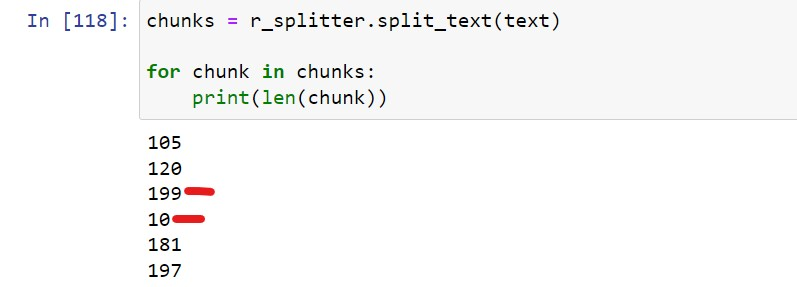